<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PEC 2. Aprendizaje supervisado: problemas de clasificación**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de poblemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación teniendo en cuenta temas relevantes de índole social, científica o ética.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes para estos problemas.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.

## Descripción de la PEC

Para ello, en este notebook tendréis que realizar 2 ejercicios que os guiarán en las tareas siguientes:

1. Descargar el conjunto de datos que utilizaremos para trabajar en un problema de clasificación.

2. Cargar el dataset escogido, limpiarlo, pre-procesarlo y dejarlo listo para realizar la clasificación.

3. Entrenar y evaluar clasificadores y optimizar sus parámetros.




## **Ejercicio 1**

En esta PEC utilizaremos el conjunto de datos **Cleveland Heart Disease**, que forma parte del conjunto de datos **Heart Disease**. Podéis obtener más información en el siguiente enlace:

https://archive.ics.uci.edu/dataset/45/heart+disease

Como veréis, el conjunto de datos original incluye cuatro subconjuntos. En esta PEC utilizaremos únicamente la versión procesada de Cleveland, que podéis descargar utilizando el código proporcionado en la siguiente celda.



In [ ]:
# Run this cell to load the dataset

!pip3 install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
features = heart_disease.data.features
targets = heart_disease.data.targets

**a) [1.5 puntos]** Una vez cargado el conjunto de datos debemos estudiar su contenido y preprocesar los datos para la aplicación de algoritmos de clasificación:
* ¿Cuántos atributos incluye el conjunto de datos?
* ¿Cuántos valores puede tomar la variable a predecir (*labels, target*) y a qué evento corresponden según la descripción del conjunto de datos?
* ¿Incluye valores nulos? Si los hay eliminad las muestras correspondientes (tened en cuenta que los valores nulos se pueden tratar de varias maneras que este ejercicio no puede abarcar en profundidad).


Para analizar los datos podéis utilizar funciones de la librería *pandas* y atributos de dataframes (*columns, head(), describe(), isnull()*) además de explorar el contenido y los metadatos de *heart_disease*.

In [ ]:
# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [ ]:
import numpy as np

display(features.columns)

display(features.describe())

display(features.head())

display(targets)
display(np.unique(targets))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


array([0, 1, 2, 3, 4])

In [ ]:
import pandas as pd

# See if there are null values and in what columns
display(features.isnull().value_counts())

# Drop rows with null values and generate new features/targets dataframes
df = pd.concat([features, targets], axis=1)
df = df.dropna()
features2 = df.iloc[:, :13]
targets2 = df.iloc[:, 13]

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal 
False  False  False  False     False  False  False    False    False  False    False  False  False    297
                                                                                      True   False      4
                                                                                      False  True       2
dtype: int64

AÑADE TU RESPUESTA AQUÍ

El conjunto de datos incluye 13 atributos.

La variable a predecir puede tomar 5 valores (0, 1, 2, 3, 4). Según la documentación, 0 corresponde a la absencia de patología y el resto a diferentes estadios.

Se han identificado 6 valores nulos en los atributos *ca*, con 4, y *thal*, con 2.

**b) [1.5 puntos]**
* Obtened y mostrad la cantidad de muestras disponibles para todas las clases incluídas y utilizad un diagrama de barras para representar los valores.
* ¿Os parece un conjunto de datos desbalanceado? ¿Qué particularidades tiene trabajar con un conjunto de datos desbalanceado?
* Agrupad las muestras en dos clases de manera que una sea la ausencia de patología y la segunda clase agrupe a todas las demás. Representar la cantidad de muestras en un nuevo diagrama de barras.

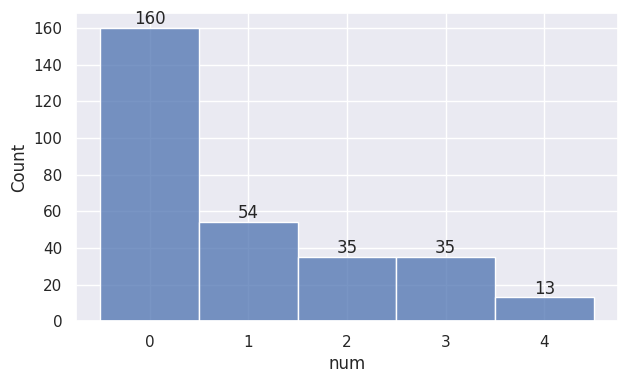

In [ ]:
# ADD AND RUN YOUR CODE HERE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
ax = sns.histplot(data=pd.concat([features2, targets2], axis=1), x='num', discrete=True)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


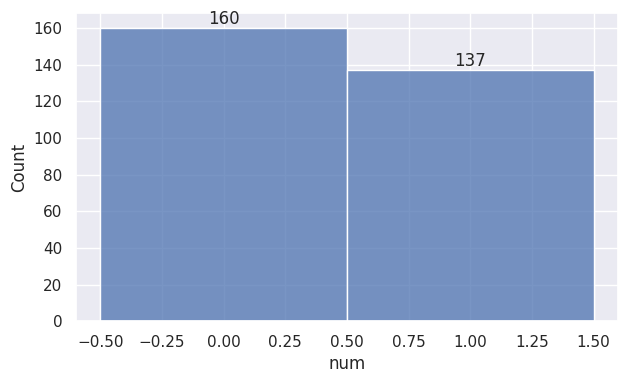

In [ ]:
# ADD AND RUN YOUR CODE HERE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

targets2_bin = pd.DataFrame(targets2>0)

plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
ax = sns.histplot(data=pd.concat([features2, targets2_bin], axis=1), x='num', discrete=True)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

AÑADE TU RESPUESTA AQUÍ

Podemos observar que el conjunto de datos original está muy desbalanceado. Esto quiere decir que el número de muestras de las diferentes clases está muy descompensado. En nuestro caso, la categoría 0 (ausencia de patología) incluye muchas más muestras. Trabajar con conjuntos de datos desbalanceados supone un mayor desafío a la hora de entrenar algoritmos de clasíficación, además de que limita el uso de métricas como accuracy.

Agrupar las clases correspondientes a la presencia de patología nos permite trabajar con un conjunto de datos mucho más balanceado (abarcando una problemática diferente y más "general").

## **Ejercicio 2**

A partir de ahora trabajaremos con los datos resultantes del ejercicio anterior, es decir, con las dos clases descritas.

**a) [1 punto]** Normalizad los datos y separadlos en los conjuntos de entrenamiento y prueba, 70% y 30% respectivamente.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_scaled = sc.fit_transform(features2)

from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(features_scaled, targets2_bin, test_size=0.3, random_state=0)

**b) [1 punto]** Con los conjuntos obtenidos, entrenad un SVM y un árbol de decisión.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

seed = 30

model_tree = DecisionTreeClassifier(random_state=seed)
model_tree.fit(X_scaled_train, y_train)

model_svm = svm.SVC(random_state=seed)
model_svm.fit(X_scaled_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=30)

**c) [1 punto]** Mostrad las matrices de confusión correspondientes a los resultados de ambos algoritmos y comentadlos.

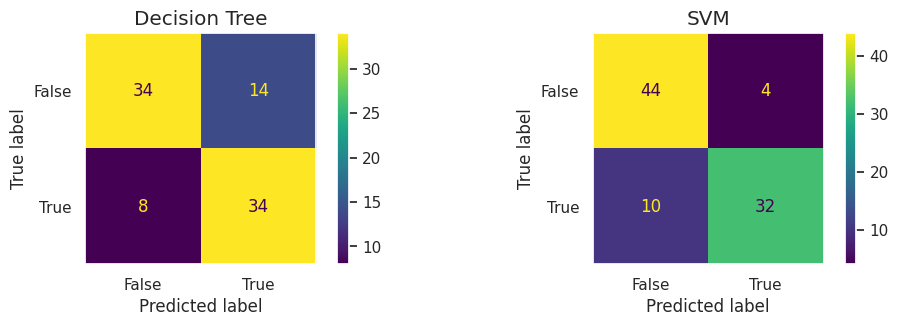

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

ax = axes[0]
cmdisp = ConfusionMatrixDisplay.from_estimator(model_tree, X_scaled_test, y_test)
cmdisp.plot(ax=ax)
ax.grid(False)
ax.set_title("Decision Tree", fontsize='large')
plt.close()

ax = axes[1]
cmdisp = ConfusionMatrixDisplay.from_estimator(model_svm, X_scaled_test, y_test)
cmdisp.plot(ax=ax)
ax.grid(False)
ax.set_title("SVM", fontsize='large')
plt.close()

AÑADE TU RESPUESTA AQUÍ

La suma de las diagonales incluyendo verdaderos positivos y negativos es mayor en el caso de SVM, lo que indicaría mejores resultados por parte de ese algoritmo. No obstante, es conveniente analizar métricas concretas para establecer más claramente las diferencias.

**d) [1 punto]** Para los dos clasificadores, obtened precision, recall y f1-score utilizando *sklearn.metrics.classification_report* y comentad los resultados.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.metrics import classification_report

y_pred_tree = model_tree.predict(X_scaled_test)
print(classification_report(y_test, y_pred_tree))

y_pred_svm = model_svm.predict(X_scaled_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       False       0.81      0.71      0.76        48
        True       0.71      0.81      0.76        42

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.76      0.76      0.76        90

              precision    recall  f1-score   support

       False       0.81      0.92      0.86        48
        True       0.89      0.76      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



AÑADE TU RESPUESTA AQUÍ

Podemos confirmar que los resultados de SVM son ligeramente superiores, como indican los valores superiores en todas las métricas estudiadas.

**e) [1.5 puntos]** Utilizando sklearn.model_selection.GridSearchCV optimizar el SVM anterior (que utiliza parámetros por defecto) explorando los parámetros y valores siguientes:
* C: 0.1, 1, 10, 100
* kernel: linear, poly, rbf

Mostrad la mejor combinación de parámetros obtenida.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

parameters = {'C': (0.1, 1, 10, 100), 'kernel': ("linear", "poly", "rbf")}
grid_svm = GridSearchCV(svm.SVC(), parameters)
grid_svm.fit(X_scaled_train, np.ravel(y_train))
sorted(grid_svm.cv_results_.keys())

display(grid_svm.best_params_)


{'C': 0.1, 'kernel': 'rbf'}

NOTA: Es importante utilizar el conjunto de entrenamiento para llevar a cabo la optimización del clasificador.

**f) [0.5 puntos]** Entrenad de nuevo el SVM en los subconjuntos de entrenamiento y prueba del ejercicio 2a pero utilizando los mejores parámetros obtenidos en el apartado anterior. Obtened la matriz de confusion, precisión, recall y f1-score y comparad los resultados con los obtenidos en el apartado 2c.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       False       0.78      0.94      0.85        48
        True       0.91      0.69      0.78        42

    accuracy                           0.82        90
   macro avg       0.84      0.81      0.82        90
weighted avg       0.84      0.82      0.82        90



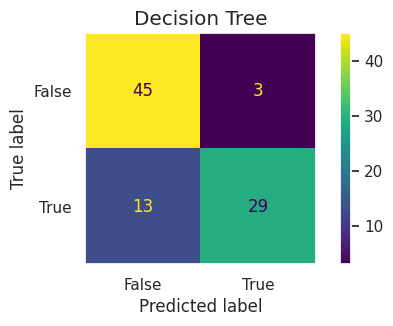

In [ ]:
# ADD AND RUN YOUR CODE HERE

model_svm_best = svm.SVC(C=0.1, kernel="rbf", random_state=seed)
model_svm_best.fit(X_scaled_train, y_train)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
cmdisp = ConfusionMatrixDisplay.from_estimator(model_svm_best, X_scaled_test, y_test)
cmdisp.plot(ax=ax)
ax.grid(False)
ax.set_title("Decision Tree", fontsize='large')
plt.close()

y_pred_svm_best = model_svm_best.predict(X_scaled_test)
print(classification_report(y_test, y_pred_svm_best))

AÑADE TU RESPUESTA AQUÍ

A pesar de que los parámetros óptimos suponían un cambio en el valor por defecto de C, la evaluación del nuevo clasificador en el conjunto de test no confirma ninguna mejora en este caso. En realidad, se produce un ligero empeoramiento de los resultados.

**g) [1 punto]** A la hora de entrenar y evaluar un clasificador es importante llevar a cabo un tratamiento adecuado de los datos y utilizar prodecidimientos y métricas que nos permitan obtener resultados que reflegen correctamente la bondad de los modelos entrenados. Teniendo en cuenta los datos y los atributos incluídos ¿qué otro tipo de análisis llevaríais a cabo para asegurar un mejor estudio de la bondad de los modelos? (Nota: revisad la noción de sesgo algorítmico, *algorithm bias*).


AÑADE TU RESPUESTA AQUÍ

El conjunto de datos utilizado incluye muestras de individuos y una patología determinada. Por lo tanto, es importante tener en cuenta que los clasificadores deben comportarse de manera satisfactoria en todos los grupos de individuos, por ejemplo, incluyendo raza o sexo. En este caso, el conjunto de datos incluye el sexo de los individuos y se debería estudiar el comportamiento de los modelos en los diferentes grupos para analizar la existencia de algún sesgo.

## **Fuentes y recursos de interés**:
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/

###Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios del Grado Multimedia, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.

Otro punto a considerar es que cualquier práctica que haga uso de recursos protegidos por copyright no podrá en ningún caso publicarse en Mosaic, la revista del Grado en Multimedia en la UOC, a no ser que los propietarios de los derechos intelectuales den su autorización explícita.